### Dynamical system:

$$
\begin{cases}
\dot{\sigma} = \beta \big( \omega_0 + \omega_1 u k - \omega_2 i_{CB}\lambda^2 - \sigma \big) \\
\dot{k} = k \big( sr - n + \xi_0 - \xi_1 \sigma - \xi_2 i_{CB} \lambda^2 \big)
\end{cases}
$$

##### Equilibrium:

$$
u^{*} = \displaystyle\frac
{g_0 \alpha_2 s i_{CB} \lambda^2}
{s (1-\alpha_2) (1-\sigma) - \alpha_1}
\quad\quad
r^{*} = (1-\sigma) u^{*}
$$

##### Numerical Solution:

$$
X(t+\Delta t) = X(t) + \Delta t \cdot \dot{X}(t) \\ = X(t) + \Delta t \cdot M(t) \cdot X(t)
$$

where

$$
M(t) = 
\begin{bmatrix}
0 & 0 & 0 \\
\beta(\omega_0 - \omega_2 i_{CB} \lambda^2) & -\beta & \beta \omega_{1} u \\
0 & -\xi_{1} k(t) & sr - n + \xi_0 - \xi_2 i_{CB} \lambda^2
\end{bmatrix}
\quad
X(t) = \begin{bmatrix} 1 \\ \sigma (t) \\ k (t) \end{bmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Setting the simulation parameters:

In [2]:
T = 3000
delta_t = 0.1

In [3]:
list_u, list_r = [], []
list_sigma, list_k = [], []
list_sigma_dot, list_k_dot = [], []

Setting the system's constants:

In [4]:
omega0, omega1, omega2 = 0.30, 0.01, 0.00005
xi0, xi1, xi2 = 0.0255, 0.05, 0.05
lamb, beta, s = 0.7, 0.0015, 0.25
alpha1, alpha2, g0 = 0.0005, 0.35, 0.45

In [5]:
def capacity_utilisation(sigma, iCB):
    global g0, s, lamb
    global alpha1, alpha2
    num = g0*alpha2*s*iCB*lamb**2
    den = s*(1-alpha2)*(1-sigma)-alpha1
    return (num/den)

def profit_rate(sigma, iCB):
    return (1-sigma) * capacity_utilisation(sigma,iCB)

In [6]:
def base_interest():
    return 0.075

def labour_growth_rate():
    return 0.002

Setting the variables' initial values:

In [7]:
sigma = 0.55
k = 0.45
X = np.array([1.0, sigma, k]).reshape((3,1))

In [8]:
def update_matrix(k, u, r, iCB, n):
    global beta, lamb, s
    global xi0, xi1, xi2
    global omega0, omega1, omega2

    matrix = [0, 0, 0,
              beta*(omega0-omega2*iCB*lamb**2), -beta, beta*omega1*u,
             0, -xi1*k, s*r-n+xi0-xi2*iCB*lamb**2]

    return np.array(matrix).reshape((3,3))

##### Loop:

1. Obtain exogeous variables;
2. Calculate equilibrium points;
3. Update the system's variables.

In [9]:
for _ in range(T):
    iCB = base_interest()
    n = labour_growth_rate()

    u_star = capacity_utilisation(X[1,0],iCB)
    r_star = profit_rate(X[1,0],iCB)

    list_u.append(u_star)
    list_r.append(r_star)

    M = update_matrix(X[2,0],u_star,r_star,iCB,n)
    X_dot = M.dot(X)
    X = X + delta_t * X_dot
    

    list_sigma.append(X[1,0])
    list_k.append(X[2,0])
    list_sigma_dot.append(X_dot[1,0])
    list_k_dot.append(X_dot[2,0])

Plotting the results:

In [10]:
plt.style.use('ggplot')

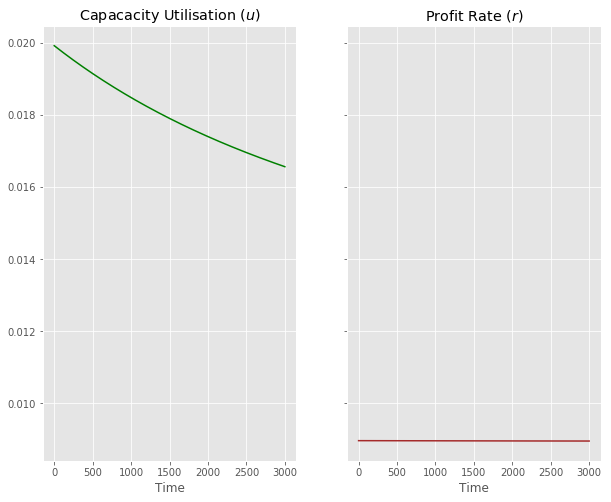

In [11]:
fig, ax = plt.subplots(ncols=2,sharey=True,figsize=(10,8))

ax[0].plot(range(T),list_u, color='green')
ax[1].plot(range(T),list_r, color='brown')

#ax[0].set_ylim([-0.0002, 0.00025])

ax[0].set_title('Capacacity Utilisation ($u$)')
ax[1].set_title('Profit Rate ($r$)')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')

plt.show()

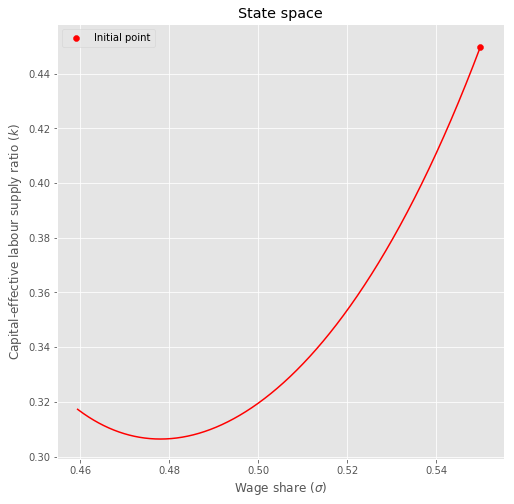

In [12]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(list_sigma,list_k, color='red')
ax.scatter(list_sigma[0],list_k[0],marker='o',color='red',alpha=1.0,label='Initial point')

ax.set_title('State space')
ax.set_xlabel('Wage share ($\sigma$)')
ax.set_ylabel('Capital-effective labour supply ratio ($k$)')
ax.legend()
plt.show()

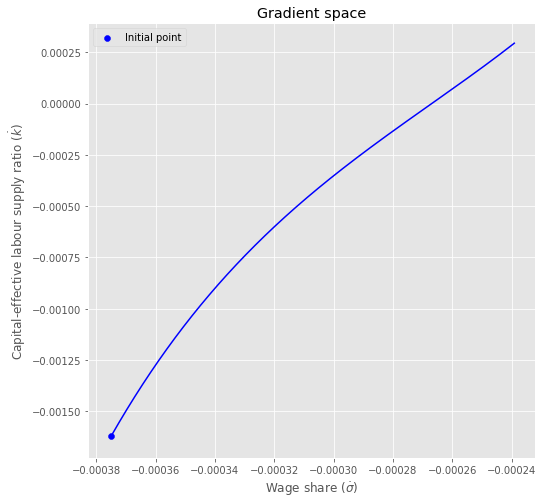

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(list_sigma_dot,list_k_dot, color='blue')
ax.scatter(list_sigma_dot[0],list_k_dot[0],color='blue',marker='o',label='Initial point')

ax.set_title('Gradient space')
ax.set_xlabel(r'Wage share ($ \dot{\sigma} $)')
ax.set_ylabel('Capital-effective labour supply ratio ($\dot{k}$)')

ax.legend()
plt.show()